### 1) What is an SVM?
##### Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification and regression. Here we used SVM to build and train a model that classifies human cells as cancerous ie, benign (mild cancer) or malignant (highly serious state). 
##### The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space.

### 2) Necessary imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 3) Cancer data

##### public source: 
##### https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbnMyT3ItQllkTGNFVFQtOU9mQ2xnSDVuWDVfZ3xBQ3Jtc0ttdHJCV2thMjl6Vkk3WDVHQXQ0N1dETWV5ZzR1cG9VZW81M3VqX3hkaXRqV1ZjRy1CZmprc21QMnV1UDRUdGVmMDNCMjNyS1YyelFmXzRuN0NqQUZkZlBrTXNXM28yS3FhRmducWI4MnFpODFrRXNVVQ&q=https%3A%2F%2Fs3-api.us-geo.objectstorage.softlayer.net%2Fcf-courses-data%2FCognitiveClass%2FML0101ENv3%2Flabs%2Fcell_samples.csv&v=7sz4WpkUIIs


#### Field name -------------------------------------> Description
##### ID ------------------------------------------------------------->  Identifier                        
##### Clump ------------------------------------------------------>  Clump thickness
##### UnifSize --------------------------------------------------->  Uniformity of cell size
##### UnifShape -------------------------------------------------->  Uniformity of cell shape
##### MargAdh ---------------------------------------------------->  Marginal adhesion
##### SingEpiSize ------------------------------------------------>  Single epithelial cell size
##### BareNuc ---------------------------------------------------->  Bare nuclei
##### BlandChrom ------------------------------------------------->  Bland chormatin
##### NormNucl --------------------------------------------------->  Normal nucleoli
##### Mit -------------------------------------------------------->  Mitoses
##### Class ------------------------------------------------------>  Benign or malignant

### 4) Load data from the CSV file
##### Benign cells are given a value 2 and malignant cells are given a value 4

In [3]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### 5) Distribution of the classes

<Axes: xlabel='Clump', ylabel='UnifSize'>

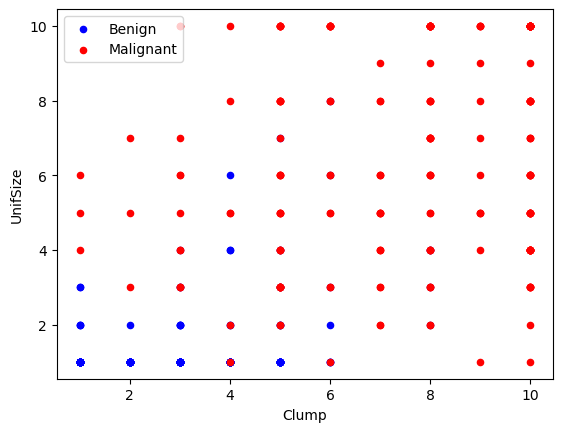

In [4]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax= axes)

#help(benign_df.plot)

### 6) Identifying the unwanted rows

In [5]:
cell_df.dtypes

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### 7) Remove unwanted columns

In [8]:
cell_df.columns
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X = np.asarray(feature_df)

y = np.asarray(cell_df['Class'])
X[0:5]
Y[0:5]

array([2, 2, 2, 2, 2])

### 8) Divide the data as Train/Test dataset

In [12]:
'''
cell_df (100 rows) => Train (80 rows) / Test (20 rows)
Train(X, y)    ## X is a 2D array, y is 1D array
Test(X,y)
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# (546, 9)
X_train.shape

# (546, 1)
y_train.shape

#(137, 9)
X_test.shape

#(137, 1)
y_test.shape

(137,)

### 9) Modelling SVM with Scikit-learn

In [19]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

### 10) Evaluation (Results)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

